In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import sklearn



In [4]:
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfTransformer
from scipy.cluster import hierarchy

## Questions.csv add whether bundle or not var and whether listening 0 or reading 1 ##

In [5]:
#rawdata = pd.read_csv('train.csv')

In [6]:
ques=pd.read_csv('questions.csv')
lec=pd.read_csv('lectures.csv')

In [7]:
ques.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [8]:
ques.shape[0]
a = ques['part']>4

In [9]:
partc=[0 for x in range(ques.shape[0])]
c=partc+a
c
ques['partc']=c

In [10]:
ques['bundlec']=0
d=ques[ques.duplicated(['bundle_id'])]

In [11]:
b=[0  for x in range(ques.shape[0])]

for x in range(len(ques['bundle_id'])):
    b[x]= ques['bundle_id'][x] in d[['bundle_id']].values
len(b)

13523

In [12]:
ques['bundlec']=b
ques['bundlec']=ques['bundlec'].astype(int)
ques.head()

,question_id,bundle_id,correct_answer,part,tags,partc,bundlec
0,0,0,0,1,51 131 162 38,0,0
1,1,1,1,1,131 36 81,0,0
2,2,2,0,1,131 101 162 92,0,0
3,3,3,0,1,131 149 162 29,0,0
4,4,4,3,1,131 5 162 38,0,0


In [13]:
ques['bundlec'].sum()

5372

## Cluster Tags ## 
## Kmeans ##

In [14]:
ques['tags'].isnull().sum()

1

In [15]:
ques['tags'] = ques['tags'].fillna(0)


In [16]:
ques['tags'] = ques['tags'].astype(str)
ques['tags'] = ques['tags'].apply(lambda x: np.array(x.split()).astype(int))

In [17]:
ques.head()

,question_id,bundle_id,correct_answer,part,tags,partc,bundlec
0,0,0,0,1,"[51, 131, 162, 38]",0,0
1,1,1,1,1,"[131, 36, 81]",0,0
2,2,2,0,1,"[131, 101, 162, 92]",0,0
3,3,3,0,1,"[131, 149, 162, 29]",0,0
4,4,4,3,1,"[131, 5, 162, 38]",0,0


In [18]:
tags=np.unique(np.concatenate(ques['tags'].values))
tags

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [19]:
question=ques.explode('tags')
question.head()


,question_id,bundle_id,correct_answer,part,tags,partc,bundlec
0,0,0,0,1,51,0,0
0,0,0,0,1,131,0,0
0,0,0,0,1,162,0,0
0,0,0,0,1,38,0,0
1,1,1,1,1,131,0,0


In [20]:
question = question[['question_id','tags']]
question=pd.get_dummies(question,columns=['tags'])
question.head()

,question_id,tags_0,tags_1,tags_2,tags_3,tags_4,tags_5,tags_6,tags_7,tags_8,...,tags_178,tags_179,tags_180,tags_181,tags_182,tags_183,tags_184,tags_185,tags_186,tags_187
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
question = question.groupby('question_id').agg(['sum'])
question.head()

,tags_0,tags_1,tags_2,tags_3,tags_4,tags_5,tags_6,tags_7,tags_8,tags_9,...,tags_178,tags_179,tags_180,tags_181,tags_182,tags_183,tags_184,tags_185,tags_186,tags_187
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
question_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
question_fit=question

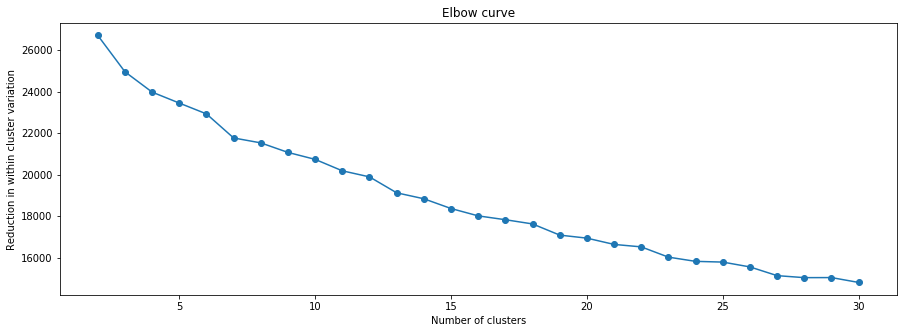

In [74]:
within_cluster_variance = [] 

for k in range(2, 31): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(question_fit)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 31), within_cluster_variance, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve');

## Social Networks ##

In [30]:
import networkx as nx
import networkx.algorithms.community as nxcom


In [31]:
ques.index

RangeIndex(start=0, stop=13523, step=1)

In [32]:
def add_edge_weight(head, tail):
    try:
        weight = G[head][tail]['weight']
    except:
        G.add_edge(head, tail, weight=1)
    else:
        G[head][tail]['weight'] += 1

# initialize graph
G = nx.Graph()

# add all nodes (tags)
for t in tags:
    G.add_node(t)
    
# add all edges (tags occurring together)
for q in ques.index:
    tags = ques.loc[q, 'tags']
    for i in range(len(tags)-1):
        for j in range(i+1, len(tags)):
            add_edge_weight(tags[i], tags[j])

In [37]:
G

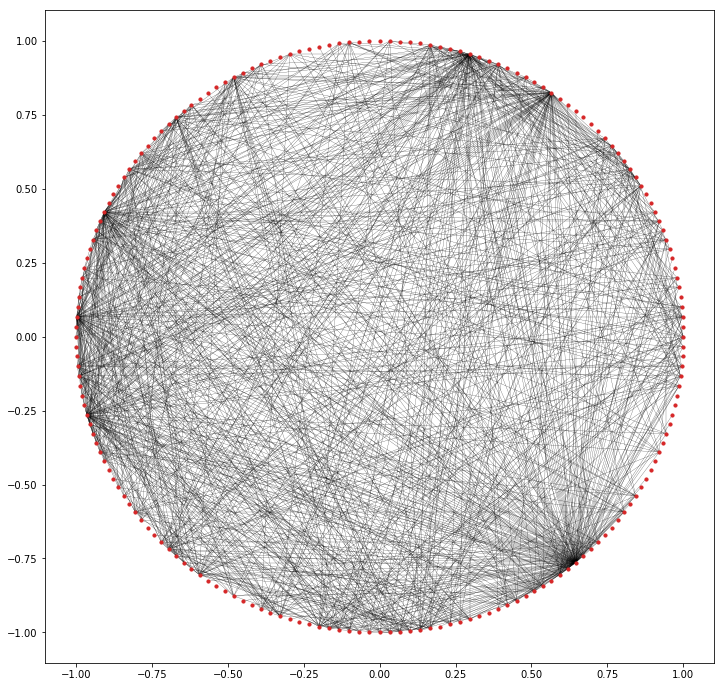

In [33]:
plt.figure(figsize=(12,12))
pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='tab:red')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=0.2)
plt.show()

In [34]:
# find all nodes without edges
nodes_zero_edge = []
for n in nx.nodes(G):
    adjlist = list(G.adj[n])
    if len(adjlist) == 0:
        nodes_zero_edge.append(n)
print(np.sort(np.array(nodes_zero_edge)))
# remove from graph
for n in nodes_zero_edge:
    G.remove_node(n)

[  4  14  15  24  25  28  31  34  43  45  47  49  57  58  66  72  75  78
  85  86  95 108 112 115 124 125 133 134 151 152 156 166 167 168 174 175
 177 181 182]


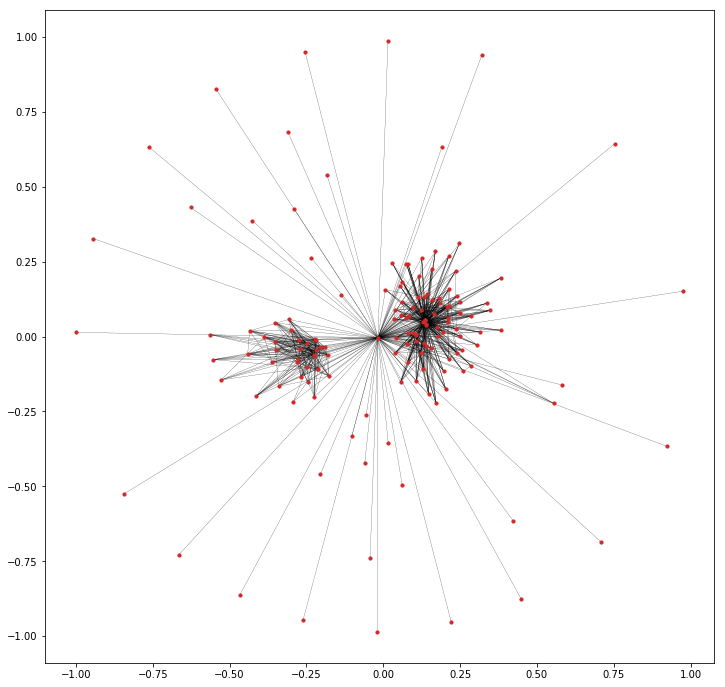

In [35]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=10, node_color='tab:red')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=0.2)
plt.show()

In [36]:
# find all nodes with a single edge
nodes_one_edge = []
for n in nx.nodes(G):
    if len(list(G.adj[n])) == 1:
        nodes_one_edge.append(n)
        
# print where all of these nodes connect to        
nodes_one_edge = np.sort(nodes_one_edge)
for n in nodes_one_edge:
    adjlist = list(G.adj[n])
    print(n, adjlist[0], G[n][adjlist[0]]['weight'])

1 162 9
7 162 2
8 162 13
23 162 1
26 162 1
27 162 41
33 162 1
44 162 1
48 162 1
52 162 2
53 162 21
54 162 1
55 162 4
60 162 1
64 162 1
65 162 1
73 162 13
79 162 3
80 162 1
89 162 1
91 162 4
96 162 5
109 162 6
116 162 1
123 162 1
127 162 1
128 162 1
132 162 1
147 162 12
159 162 2
170 162 1
172 162 1
173 162 4
179 162 6
180 162 2


In [38]:
# remove all nodes with only a single edge
for n in np.sort(nodes_one_edge):
    G.remove_node(n)

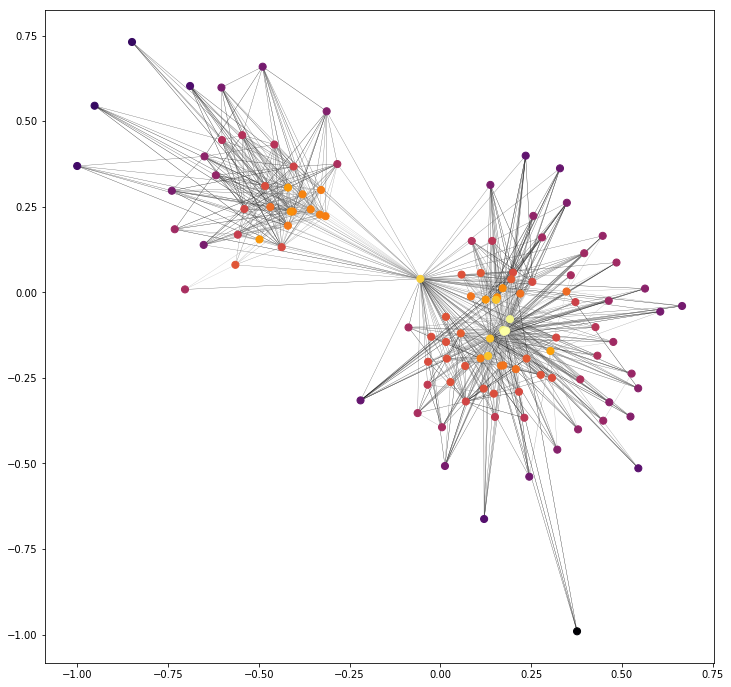

In [40]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)

nweights = []
for n in G.nodes():
    nweights.append(np.log10(np.sum([G.adj[n][x]['weight'] for x in G.adj[n]])))
eweights = np.log10([d['weight'] for (u, v, d) in G.edges(data=True)])

nx.draw_networkx_nodes(G, pos, node_size=50, node_color=nweights, cmap=plt.cm.inferno)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color=eweights, edge_cmap=plt.cm.Greys_r, width=0.3)
plt.show()

## Gaussian Mixture Model ##

In [28]:
from sklearn import mixture
lowest_bic = np.infty
bic = []
n_components_range = range(1, 13)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = mixture.GaussianMixture(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(question_fit)
        bic.append(gmm.bic(question_fit))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [27]:
best_gmm

NameError: name 'best_gmm' is not defined

In [115]:
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

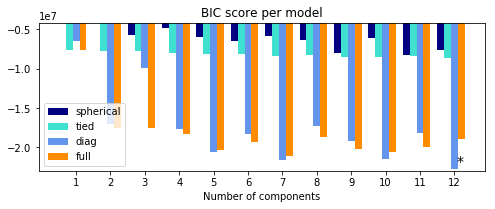

In [116]:
bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []
X=question_fit
# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)



(array([6128.,  751., 1344.,  527.,  422., 2502.,  302.,  296.,  215.,
        1036.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <a list of 10 Patch objects>)

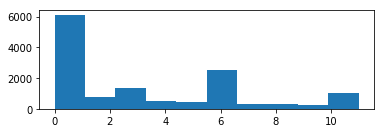

In [117]:
# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X)
plt.hist(Y_)

In [26]:
clf.means_

NameError: name 'clf' is not defined

In [98]:
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title(f'Selected GMM: {best_gmm.covariance_type} model, '
          f'{best_gmm.n_components} components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

TypeError: unhashable type: 'numpy.ndarray'

In [104]:
n_samples = 500
C = np.array([[0., -0.1], [1.7, .4]])
X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
          .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]
X

array([[-2.83140662, -0.57784811],
       [ 3.53924607,  1.00238481],
       [ 0.4183672 ,  0.1323777 ],
       ...,
       [-5.89557827,  2.30615392],
       [-6.47536015,  4.12240565],
       [-4.98874107,  3.67141568]])

In [105]:
# display predicted scores by the model as a contour plot
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.scatter(X_train[:, 0], X_train[:, 1], .8)

plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()

ValueError: Expected the input data X have 188 features, but got 2 features

## Hierachical Clustering ##

In [23]:
cols = list(question_fit.columns)

array([1, 3, 2, ..., 3, 3, 3], dtype=int64)

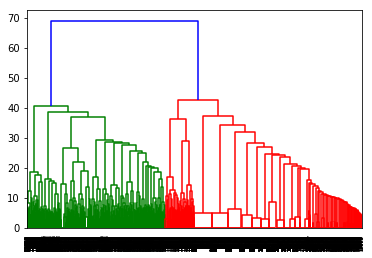

In [24]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

cols = list(question_fit.columns)

dendrogram = sch.dendrogram(sch.linkage(question_fit[cols], method='ward'))
hc = AgglomerativeClustering(n_clusters=7, affinity = 'euclidean', linkage = 'complete')
hc.fit(question_fit[cols])
hc.labels_

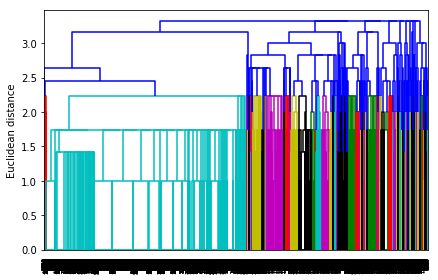

In [25]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

row_clusters = linkage(pdist(question_fit, metric='euclidean'), method='complete')
row_dendr = dendrogram(row_clusters)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

## Lectures.csv add type numeric var and whether listening 0 or reading 1 ##

In [198]:
lec.head()

,lecture_id,tag,part,type_of,partc,type
0,89,159,5,concept,1,0
1,100,70,1,concept,0,0
2,185,45,6,concept,1,0
3,192,79,5,solving question,1,2
4,317,156,5,solving question,1,2


In [191]:
lec.shape[0]
aa = lec['part']>4
partcc=[0 for x in range(lec.shape[0])]
cc=partcc+aa
cc
lec['partc']=cc

In [192]:
lec.head()

,lecture_id,tag,part,type_of,partc
0,89,159,5,concept,1
1,100,70,1,concept,0
2,185,45,6,concept,1
3,192,79,5,solving question,1
4,317,156,5,solving question,1


In [195]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(lec['type_of'])
lec['type']=y
lec.head()

,lecture_id,tag,part,type_of,partc,type
0,89,159,5,concept,1,0
1,100,70,1,concept,0,0
2,185,45,6,concept,1,0
3,192,79,5,solving question,1,2
4,317,156,5,solving question,1,2


## Test Data ##

In [42]:
test=pd.read_csv('example_test.csv')
test.head()

,row_id,group_num,timestamp,user_id,content_id,content_type_id,task_container_id,prior_question_elapsed_time,prior_question_had_explanation,prior_group_answers_correct,prior_group_responses
0,0,0,0,275030867,5729,0,0,NaN,NaN,[],[]
1,1,0,13309898705,554169193,12010,0,4427,19000.0,True,NaN,NaN
2,2,0,4213672059,1720860329,457,0,240,17000.0,True,NaN,NaN
3,3,0,62798072960,288641214,13262,0,266,23000.0,True,NaN,NaN
4,4,0,10585422061,1728340777,6119,0,162,72400.0,True,NaN,NaN


In [47]:
x=[1 for x in range(test.shape[0])]
x

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [48]:
test['prior_group_answers_correct']=x

In [50]:
re=test[['row_id','group_num','prior_group_answers_correct']]

In [51]:
re.to_csv('result.csv')